In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import random
import time
%matplotlib inline

# 実データを扱う場合

In [2]:
# 元データに対しては、以下の処理を行う
# # text形式の元データを読み込む
# network = pd.read_table("soc-Epinions1.txt",header=3)
# # ノードidをユニークする
# node_id = network["ToNodeId"].unique()
# # 入次数を計算する
# in_deg = []
# for i in tqdm(node_id):
#     in_deg.append(sum(network["ToNodeId"]==i))
# # ノード毎の入次数を表にまとめた
# in_deg_df = pd.DataFrame({"ToNodeId":node_id, "in_degree":in_deg})
# in_deg_df = in_deg_df.sort_values("ToNodeId").reset_index(drop=True)
# # 入次数から枝確率を計算する
# in_deg_df["p"] = 1/in_deg_df["in_degree"]
# network_p = pd.merge(network, in_deg_df, on="ToNodeId", how="left").drop(columns="in_degree")

In [3]:
# データの読み込み
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data.csv")
network[:5]

,# FromNodeId,ToNodeId,p
0,0,4,0.008000
1,0,5,0.005682
2,0,7,0.033333
3,0,8,0.009615
4,0,9,0.066667


In [4]:
# numpy型に変換
network_np = network.values

In [5]:
# 空の有向グラフを作成
G = nx.DiGraph()

In [6]:
# 重み付きの枝を加える
G.add_weighted_edges_from(network_np)

# 練習

In [7]:
G = nx.DiGraph()

In [8]:
weighted_edges = [[0,1,0.1],
                  [0,2,0.2],
                  [1,3,0.3],
                  [1,4,0.4],
                  [2,4,0.5],
                  [2,0,0.6],
                  [3,0,0.7],
                  [3,1,0.8],
                  [4,3,0.9],
                  [4,2,1.0]
                 ]

In [9]:
G.add_weighted_edges_from(weighted_edges)

/Users/fuekimasao/anaconda3/envs/use/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/fuekimasao/anaconda3/envs/use/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


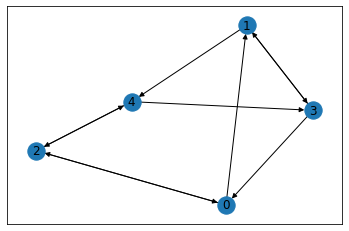

In [10]:
# ネットワークを描画できる
nx.draw_networkx(G)
plt.show()

In [11]:
# ノード
print(nx.nodes(G))

[0, 1, 2, 3, 4]


In [12]:
# ノード数
print(nx.number_of_nodes(G))

5


In [13]:
# グラフのdensity
print(nx.density(G))

0.5


In [14]:
# 各ノードの入次数(ノードid,入次数)
print(G.in_degree())

[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]


In [15]:
# 各ノードの出次数(ノードid,出次数)
print(G.out_degree())
# [(3, 3), (0, 3), (2, 2), (1, 2), (4, 2)]

# ノード1の出次数
# out_deg = G.out_degree()
# out_deg[1]
# 2

[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]


In [16]:
# 指定されたノードから出る枝を列挙
print(G.out_edges(3))
# [(3, 0), (3, 2), (3, 1)]

print(G.out_edges([3]))
# [(3, 0), (3, 2), (3, 1)]

print(G.out_edges([3,2]))
# [(3, 0), (3, 2), (3, 1), (2, 0), (2, 4)]

[(3, 0), (3, 1)]
[(3, 0), (3, 1)]
[(3, 0), (3, 1), (2, 4), (2, 0)]


In [17]:
# 指定されたノードに入る枝を列挙
print(G.in_edges(3))
# [(1, 3), (4, 3)]

print(G.in_edges([3]))
# [(1, 3), (4, 3)]

print(G.in_edges([3,2]))
# [(1, 3), (4, 3), (3, 2), (0, 2), (4, 2)]

[(1, 3), (4, 3)]
[(1, 3), (4, 3)]
[(1, 3), (4, 3), (0, 2), (4, 2)]


In [18]:
# (0,1)の重みを知りたい場合
print(G[0][1])
# {'weight': 0.1}

{'weight': 0.1}


In [19]:
# ノード3のout-neighbor頂点
print(list(G.successors(3)))
# [0, 2, 1]

[0, 1]


In [20]:
# ノード3のin-neighbor頂点
print(list(G.predecessors(3)))
# [1, 4]

[1, 4]


In [23]:
# ノード0からの到達可能ノードまでの最短パス
print(nx.single_source_shortest_path(G, 0))
# {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3], 4: [0, 1, 4]}

{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3], 4: [0, 1, 4]}


In [24]:
# ノード0までの到達可能ノードまでの最短パス
print(nx.single_target_shortest_path(G, 0))
# {0: [0], 2: [2, 0], 3: [3, 0], 4: [4, 2, 0], 1: [1, 3, 0]}

{0: [0], 2: [2, 0], 3: [3, 0], 4: [4, 2, 0], 1: [1, 3, 0]}


In [26]:
pred, dist = nx.dijkstra_predecessor_and_distance(G, 0)
# ノード0から各ノードへの最短経路の一個手前のノード
print(sorted(pred.items()))
# [(0, []), (1, [0]), (2, [0]), (3, [1]), (4, [1])]

# ノード0から各頂点までの距離
print(sorted(dist.items()))
# [(0, 0), (1, 0.1), (2, 0.2), (3, 0.4), (4, 0.5)]

[(0, []), (1, [0]), (2, [0]), (3, [1]), (4, [1])]
[(0, 0), (1, 0.1), (2, 0.2), (3, 0.4), (4, 0.5)]


In [28]:
# ノード0からノード4までの最短経路 
print(nx.dijkstra_path(G,0,4))
# [0, 1, 4]

[0, 1, 4]


In [44]:
# 任意のノード間についてダイクストラで計算
len_path = dict(nx.all_pairs_dijkstra(G))

# ノード3から各ノードへの最短距離
print(len_path[3][0])

# ノード3から各ノードへの最短経路
print(len_path[3][1])

{3: 0, 0: 0.7, 1: 0.7999999999999999, 2: 0.8999999999999999, 4: 1.2}
{3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2], 4: [3, 0, 1, 4]}


In [47]:
# 任意のノード間について最短距離が1以下の経路をダイクストラで計算
len_path = dict(nx.all_pairs_dijkstra(G, cutoff=1))

# 上と比較すると、ノード3から4への経路が消えている
# ノード3から各ノードへの最短距離
print(len_path[3][0])

# ノード3から各ノードへの最短経路
print(len_path[3][1])

{3: 0, 0: 0.7, 1: 0.7999999999999999, 2: 0.8999999999999999}
{3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2]}


In [49]:
%timeit len_path = dict(nx.all_pairs_dijkstra(G))
%timeit len_path = dict(nx.all_pairs_dijkstra(G, cutoff=1))

# 70.7 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# 57.1 µs ± 461 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# わずかに速くなっている

67.3 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
56.6 µs ± 429 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
